# Welcome to the PARIS School of AI

C'est le premier Workshop officiel de la team Paris School of AI. Tu vas apprendre :



*   Comment fonctionne un réseau de neurone "sous le capot".
*   Construitre un réseau de neurone artificiel à la dûr, en utilisant seulement Python et Numpy *from scratch.*
*   Ainsi que l'appliquer sur MNIST, un dataset qui a servi de base à un des premiers cas d'usage à grande echelle du Deep Learning.
*   Et tout plein de trucs à astuces pour construire tes propres réseaux de neurones.

## Pourquoi s'embêter à apprendre comment ça fonctionne sous le capot? 

Question légitime. En soit, ce qu'on va prendre une heure à coder à la dûr avec numpy, on peut obtenir un résultat tout aussi bon avec sci-kit learn ou keras en moins de 2 minutes et 5 lignes de code.

**Alors, oui, pourquoi?**


Premièrement, si tu as l'ambition de construire des réseaux de neurones, en connaître les mécaniques internes te permettras de les coder bien plus vite et de passer bien moins de temps à les débuguer quand ils ne se comporteront pas comme prévu, ce qui sera souvent le cas.

Ensuite, beaucoup de prédictions sur les futures conséquences du Deep Learning sur la société ont été formulées La *hype* qui l'entoure est omniprésente et les médias *mainstream* n'arrangent pas les choses. Certaines de ses prédictions sont plausibles, d'autres non.

**Exemple, "Le deep learning va remplacer les humains dans leur travail." v.s. "Le Deep Learning a vaincu l'humain au GO, demain il va conquérir la Terre comme dans Matrix.", quel titre est plausible, lequel ne l'est pas?**

Connaître comment ça se passe sous le capot, te permettra de *cut through the bullshit*. Jusqu'à maintenant le succès du Deep Learning repose sur une une recette qui a été adaptée avec succès à une variété impressionnante de domaine. 

Cette recette comprend 3 parties:

*   Emettre une prédiction avec un réseau de neurones pour évaluer quantitativement l'érreur qu'il commet. (Feed forward)
*   Identifier la résponsabilité de chaque partie du réseau de neurones dans l'erreur commise. (Backpropagation)
*   Répéter les deux étapes précédentes en boucle, et à chaque répétition modifier les parties du réseaux qui commettent des erreurs dans l'espoir qu'elles en commetent moins. (Gradient Descent)

C'est ça le Deep Learning, et ça permet de transformer, à force de répétion un réseau qui fait des prédictions inutiles en un réseau qui fait des prédictions utiles.


Si la *hype* est belle et bien présente, le potentiel disruptif de cette techologie l'est aussi. Connaître les tenants et les aboutissants  de cette recette te permettra de reconnaître ce qui rélève du champ des possibles, de ce qui n'est tout simplement que de la *sci-fi*.

Cela te sera utile que tu sois dans l'optique de monter une start-up deep tech, ou pour savoir où orienter ta carrière.

## Comment "run" une cellule?

Il suffit d'appuyer CTRL+ENTER ou SHIFT+ENTER sur une cellule de code pour qu'elle s'execute.

In [1]:
# Package imports
print("It's running and busy in the background!")
print("...\n\n")
!pip install -U scikit-learn

import sklearn
print(f'La version de scikit learn est: {sklearn.__version__}')
assert sklearn.__version__ == "0.20.1", "Clique sur Execution," + \
" Redémarrez l'environnement d'execution."
## Dataset Libraries
from sklearn.metrics import classification_report
from sklearn.datasets import make_moons
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegressionCV

## Maths libraries
import math
import numpy as np
## Plot libraries
import matplotlib.pyplot as plt
import matplotlib
### Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

#Fonctions
def create_an_illustationnal_dataset():
  np.random.seed(0)
  X, y = make_moons(200, noise=0.20)
  return X, y

def plot_the_dataset(X, y):
    plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
    plt.title("Notre premier dataset")
    plt.xlabel("Feature 1 (X[1])")
    plt.ylabel("Feature 2 (X[0])")
    plt.show()

# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)


#
# Merci de laisser ça en dehors de la fonction.
print('...\n')
MNIST = fetch_openml('mnist_784', version=1) 
print('...\n')
    
def get_mnist_data():
    """ Download MNIST Dataset.
    return X, y
    """
    return MNIST["data"], MNIST["target"]
  
def plot_x_image(x, y=None):
    """ Show a MNIST digit.
    
    Parameters:
    -----------
    x : image
    y : label
    
    """
    plt.figure(figsize = (4 ,4))
    plt.imshow(x.reshape(28,28), cmap = matplotlib.cm.binary)
    if y is not None: plt.title(f'Label = {y}')
    else: plt.title('Handwritten Digit')
    plt.axis("off")
    plt.show()

def is_empty(cache):
    return not cache
  
def predict(X, params):
  """ Cette fonction permet d'utiliser les paramètres du réseaux pour faire une 
  prédiction sur X.
  Retourne une liste de predictions. 
  """
  last_layer_index = params["n_layers"]
  cache = feed_forward(X, params)
  predictions = np.argmax(cache[f"A{last_layer_index}"], axis=0)
  return predictions
    
def one_hot_encoding(y, n_examples, n_classes):
    """ One hot Encode les labels y.
    Arguments:
        y : dataset de label
        n_examples : nombre d'exemples dans y
        n_classes  : nombre de classes
    """
    y = y.reshape(1, n_examples)
    one_hot = np.eye(n_classes)
    Y_new = one_hot[y.astype('int32')]
    return Y_new.T.reshape(n_classes, n_examples)

def separate_linearly(X,y):
    clf = LogisticRegressionCV(cv=3)
    clf.fit(X, y)
    plot_decision_boundary(lambda x: clf.predict(x))
    

def get_une_jolie_matrice():
    joli_vecteur1 = [2*i + 1 for i in range(10)]
    joli_vecteur2 = [2*i for i in range(10)]
    joli_vecteur3 = [-1 -i for i in range(10)]
    jolie_matrice = np.array([joli_vecteur1, joli_vecteur2, joli_vecteur3])
    return jolie_matrice
    
def is_this_first_layer(cache):
    """ A partir du cache, indique:
        True s'il s'agit du premier layer.
        Faux s'il ce n'est pas le cas.
    """
    if is_empty(cache):
       return True
    else:
       return False
  
def is_this_last_layer(index, n_layers):
    """ A partir du nombre de l'index actuel et du nombre de layer, indique:
        True s'il s'agit du dernier layer
        Faux sinon
    """
    return i == n_layers
  
def shuffling_data(X, y):
    """Prend des exemples X, et un label y et les mélange aléatoirement.
        Retourne X, y, mais dans un ordre différent.
    """
    permutation = np.random.permutation(X_train.shape[1])
    return X[:, permutation], y[:, permutation]

def get_minibatch(X, y, minibatch_indices):
    """A partir de X, y et des indices du minibatch actuel, retourne,
       X_mini : une petite portion de X
       y_mini : les labels correspondant à X_mini
       this_batch_size : la taille de ce minibatch
    """
    begin, end = minibatch_indices
    X_mini = X[:, begin:end]
    y_mini = y[:, begin:end]
    this_batch_size = end - begin
    return X_mini, y_mini, this_batch_size 
  
def get_mini_batch_indices(X, batch_size, n_batch):
    """A partir de X, batch_size et n_batch, retourne une liste d'indices pour 
      découper X et y en minibatch.
    """
    # Map 0, 1, 2... to 0, 1 * batch_size, 2 * batch_size 
    get_batch_start_index = lambda batch_idx : batch_idx * batch_size  
    # Basically: `start + batch_size`, but need to watch for index overflow.
    add_offset_to_start = lambda b : min(b + batch_size, X_train.shape[1])
    
    start_indices = [get_batch_start_index(each) for each in range(n_batch)]
    end_indices   = [add_offset_to_start(each) for each in start_indices]
    
    return list(zip(start_indices, end_indices))
  
def report_training_improvement(X_train, y_train, X_eval, y_eval, params, i):
    """ Affiche la loss pour une epoch.
    X_train, y_train : dataset d'entraînement
    X_eval, y_eval : dataset d'évaluation
    params: les paramètres du modèle à cette epoch
    i: le numéro de l'epoch.
    """
    last_layer_index = params["n_layers"]
    
    # TODO Compute cost.
    cache = feed_forward(X_train, params)
    train_cost = compute_loss(y_train, cache[f"A{last_layer_index}"])
    
    if X_test is not None:
        cache = feed_forward(X_eval , params)
        test_cost  = compute_loss(y_eval, cache[f"A{last_layer_index}"])
    
    print(f"Epoch {i+1}: training cost = {train_cost}, test cost = {test_cost}")
    
def evaluate_network(X, y, params):
  """A partir d'un dataset (X, y) et des paramètres du réseaux,
  affiche un compte rendu de réussite.
  """
  predictions = predict(X, params)
  labels = np.argmax(y, axis=0)
  print(classification_report(predictions, labels))
  

print('Excellent, you just run succesfully the first cell of this workshop!')

It's running and busy in the background!
...


    100% |████████████████████████████████| 5.4MB 4.6MB/s 
  Found existing installation: scikit-learn 0.19.2
    Uninstalling scikit-learn-0.19.2:
      Successfully uninstalled scikit-learn-0.19.2
La version de scikit learn est: 0.20.1
...

...

Excellent, you just run succesfully the first cell of this workshop!


**Maintenant tu peux réduire cette partie en cliquant sur la petite flèche a côté du titre "Comment "run" une cellule?""**

## Les maths pour le Deep Learning en 10 minutes (vol. 1 avec NUMPY)

Cette partie est comme un livre de recettes, alors je vais passer très vite dessus. Libre à vous de vous y référer plus tard dans le workshop. J'espère que ça vous sera utile. Je vous laisse 5 minutes pour en prendre connaissances, ensuite j'ajouterai quelques commentaires pour passer à la suite.

### Hello Numpy!

Numpy te permet d'effectuer des opérations mathématiques sur des matrices et vecteurs de façon très rapide. Il est très simple d'utilisation mais pourtant très puissant. Certains le comparent à Matlab.

In [0]:
import numpy as np

### Qu'est-ce qu'un vecteur?

C'est une liste de nombres.

In [0]:
vector_A = np.array([0, 1])
print('vecteur dimension=',vector_A.ndim,
      'shape =', vector_A.shape,
      '\n', vector_A)
print('\n\nAccès à l\'indice [0] :', vector_A[0],
      '\nAccès à l\'indice [1] :', vector_A[1])

vecteur dimension= 1 shape = (2,) 
 [0 1]


Accès à l'indice [0] : 0 
Accès à l'indice [1] : 1


### Qu'est-ce qu'une matrice?

C'est un tableau de nombres.

In [0]:

matrix_A = np.array([[0, 1],
                    [2, 3]])
print('\nmatrice dimension=',matrix_A.ndim,
      'shape=',matrix_A.shape,
      '\n', matrix_A)
print('\n\nAccès à la rangée [0] :', matrix_A[0], 
      '\nAccès à la rangée [1] :', matrix_A[1])
print('Accès à la colonne [:, 0] :', matrix_A[:, 0], 
      '\nAccès à la colonne [: ,1] :', matrix_A[:, 1])


matrice dimension= 2 shape= (2, 2) 
 [[0 1]
 [2 3]]


Accès à la rangée [0] : [0 1] 
Accès à la rangée [1] : [2 3]
Accès à la colonne [:, 0] : [0 2] 
Accès à la colonne [: ,1] : [1 3]


### A quoi réfère-t-on quand on parle de "dimension" avec Numpy?

Au nombre d'index qu'il faut pour accéder à ce qu'il contient.

Ainsi un vecteur, même si il contient 10000 éléments est considéré de dimension 1 par numpy car il suffit d'un index pour y accéder.

(même raisonnement pour établir qu'une matrice à une dimension 2 dans numpy.)

### Vérifier le nombre d'éléments par dimensions grace à* .shape*

In [0]:
vector_A = np.array([0, 1])
print('vecteur dimension=',vector_A.ndim,
      'shape=', vector_A.shape,
      '\n', vector_A)

vector_A_reshaped = vector_A.reshape((2,1))

print('vecteur reshaped dimension=',vector_A_reshaped.ndim,
      'shape=', vector_A_reshaped.shape,
      '\n', vector_A_reshaped)


vector_A_reshaped = vector_A.reshape((1, 1, 1, 2, 1))

print('vecteur reshaped dimension=',vector_A_reshaped.ndim,
      'shape=', vector_A_reshaped.shape,
      '\n', vector_A_reshaped)


vecteur dimension= 1 shape= (2,) 
 [0 1]
vecteur reshaped dimension= 2 shape= (2, 1) 
 [[0]
 [1]]
vecteur reshaped dimension= 5 shape= (1, 1, 1, 2, 1) 
 [[[[[0]
    [1]]]]]


### Accéder à la transposée 

In [0]:
matrix_A = np.array([[0, 1],
                    [2, 3]])
print('\nmatrice dimension=',matrix_A.shape,
      '\n', matrix_A)

matrix_A_transpose = matrix_A.transpose()
print("Transposée")
print(matrix_A_transpose)


matrice dimension= (2, 2) 
 [[0 1]
 [2 3]]
Transposée
[[0 2]
 [1 3]]


### Dot Product

C'est la somme pondéré des éléments d'un vecteur par les éléments d'un autre vecteur

In [0]:
vector_A = np.array([0, 1])
vector_B = np.array([1, 0])


print("Dot Product de deux vecteurs orthogonaux.")
print(vector_A.dot(vector_B))
print("Dot product d'un vecteur avec lui même.")
print(vector_B.dot(vector_B))


vector_A = np.array([3, 1])
vector_B = np.array([1, 16])
print("Dot Product de deux vecteurs quelconques.")
print(vector_A.dot(vector_B))

print("Equivalent informatiquement à :")
dot_product = 0
for a,b in zip(vector_A.tolist(), vector_B.tolist()):
    dot_product += a * b
print(dot_product)


Dot Product de deux vecteurs orthogonaux.
0
Dot product d'un vecteur avec lui même.
1
Dot Product de deux vecteurs quelconques.
19
Equivalent informatiquement à :
19


### Multiplication de Matrices

np.dot() s'occupe des multiplications de matrices.

In [0]:
A = np.identity(4)
B = np.random.randn(4, 4)

print('A\n',A)
print('B\n',B)
print(f"\n Multiplication de A par B, {A.shape} {B.shape} ")
print(A.dot(B))

A
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
B
 [[ 0.74095156 -0.64100877 -0.63009853  1.26155565]
 [ 0.55830101 -0.38639733 -0.61791961 -0.37548178]
 [ 0.35827682  0.23993406 -0.08765671 -0.22120781]
 [-0.69115116 -0.36165891  0.1631319   0.12235086]]

 Multiplication de A par B, (4, 4) (4, 4) 
[[ 0.74095156 -0.64100877 -0.63009853  1.26155565]
 [ 0.55830101 -0.38639733 -0.61791961 -0.37548178]
 [ 0.35827682  0.23993406 -0.08765671 -0.22120781]
 [-0.69115116 -0.36165891  0.1631319   0.12235086]]


In [0]:
A = np.identity(2)
B = np.random.randn(2, 4)

print('A\n',A)
print('B\n',B)
print(f"\n Multiplication de A par B, {A.shape} {B.shape} ")
print(A.dot(B))

A
 [[1. 0.]
 [0. 1.]]
B
 [[-0.2913832  -0.59125388 -0.31919861 -0.4413445 ]
 [-0.78683896  1.19497606 -0.53673851 -1.41167478]]

 Multiplication de A par B, (2, 2) (2, 4) 
[[-0.2913832  -0.59125388 -0.31919861 -0.4413445 ]
 [-0.78683896  1.19497606 -0.53673851 -1.41167478]]


In [0]:
A = np.identity(2)
B = np.random.randn(4, 2)

print('A\n',A)
print('B\n',B)
print(f"\nMultiplication de A par B, {A.shape} {B.shape} ")
print("nota bene; l'erreur est intentionnelle.")
print(A.dot(B))

A
 [[1. 0.]
 [0. 1.]]
B
 [[ 0.10445094  2.1799707 ]
 [-0.67476188 -0.8655759 ]
 [-0.81786503  0.04500882]
 [-0.01457133  1.01185205]]

Multiplication de A par B, (2, 2) (4, 2) 
nota bene; l'erreur est intentionnelle.


ValueError: ignored

### Matrices / Vecteurs

In [0]:
A = np.identity(4)
b = np.arange(1, 5)

print('A\n', A)
print('b\n', b)

print("\nelement wise multiplication : A * b")
print(A * b)

print("\nnp.dot : A.dot(b)")
print(A.dot(b))

print("\nnp.dot : b.dot(A)")
print(b.dot(A))


A
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
b
 [1 2 3 4]

element wise multiplication : A * b
[[1. 0. 0. 0.]
 [0. 2. 0. 0.]
 [0. 0. 3. 0.]
 [0. 0. 0. 4.]]

np.dot : A.dot(b)
[1. 2. 3. 4.]

np.dot : b.dot(A)
[1. 2. 3. 4.]


###Pourquoi les vecteurs et les matrices?

#### Un seul neurone artificiel est représentable par un Dot Product

![nn dot product](https://i.imgur.com/CNmjqLo.jpg)

In [0]:
parameters_w = [0.1, 0.6, -0.5]
inputs_a = [1, 0.5, 2]

preactivation_z = np.dot(parameters_w, inputs_a)

print("w =", parameters_w)
print("a =", inputs_a)
print("\nZ = w.dot(a) =",preactivation_z)

w = [0.1, 0.6, -0.5]
a = [1, 0.5, 2]

Z = w.dot(a) = -0.6


#### On peut aussi faire passer plusieurs exemples par le même neurone en même temps, en empilant les entrées dans une matrice.

![Texte alternatif…](https://i.imgur.com/1gUEIHJ.jpg)

In [0]:
parameters_w = np.array([1, 2, -1])
inputs_A = np.array([[1, 0.5, 2], [2, 1, 10]])

preactivation_z = np.dot(inputs_A, parameters_w)


print("w =", parameters_w)
print("A =\n", inputs_A)
print("\nz = A.dot(w) =",preactivation_z)

w = [ 1  2 -1]
A =
 [[ 1.   0.5  2. ]
 [ 2.   1.  10. ]]

z = A.dot(w) = [ 0. -6.]


#### Une couche de neurones artificiels est représentable par une matrice de paramètres

![Texte alternatif…](https://i.imgur.com/vhngUKg.jpg)

In [0]:
W = np.array([[0.1, 0.6, -0.5], [0.3, -0.6, 10]])
a = np.array([1, 0.5, 2])

Z = np.dot(W, a)

print("W =\n", W)
print("a =", a)
print("\nz = W.dot(a) =",preactivation_z)

W =
 [[ 0.1  0.6 -0.5]
 [ 0.3 -0.6 10. ]]
a = [1.  0.5 2. ]

z = W.dot(a) = -0.6


#### Et bien sûr , on peut faire passer plusieurs exemples dans la même couche en même temps grace à une multiplication matricielle.

![Texte alternatif…](https://i.imgur.com/MzgPVFt.jpg)

In [0]:
W = np.array([[1, 2, 0.5], [0.1, 0.3, -10]])
A = np.array([[1, 1, 1], [2, 2, 2], [-1, -1, -1]])

Z = np.dot(A, W.T)

out = f"""
A.shape = {A.shape}
A = 
{A}


W.shape = {W.shape}
W = 
{W}

W.T.shape = {W.T.shape}
W.T = 
{W.T}

~~~~~~~~~~~~~~~~~~~~~~~

Z = A.dot(W.T)=
{Z}

"""
print(out)


A.shape = (3, 3)
A = 
[[ 1  1  1]
 [ 2  2  2]
 [-1 -1 -1]]


W.shape = (2, 3)
W = 
[[  1.    2.    0.5]
 [  0.1   0.3 -10. ]]

W.T.shape = (3, 2)
W.T = 
[[  1.    0.1]
 [  2.    0.3]
 [  0.5 -10. ]]

~~~~~~~~~~~~~~~~~~~~~~~

Z = A.dot(W.T)=
[[  3.5  -9.6]
 [  7.  -19.2]
 [ -3.5   9.6]]




### Numpy, ses axes et le fonctionnement de np.sum

Pour un array de dimension 2 vous pouvez vous référer à ça:
![Np sum pour matrice 2D](http://www.elimhk.com/myblog/wp-content/uploads/2017/04/axis.png)

Malheureusment l'analogie s'arrête là. Et ça devient plus complexe quand les dimensions augmentent

#### Colonne ? Rangée?

Dans le glossaire officiel numpy.

Une rangée (ROW) correspond à l'axis 0

Une colonne (COLUMN) correspont à l'axis 1

![Explication ROW/COLUMN numpy](https://i.stack.imgur.com/h1alT.jpg)

In [0]:
np.random.seed(42)

v_fluide = np.random.randint(low=0, high=5, size=10)

row_v = v_fluide.reshape(-1, 1)

col_v = v_fluide.reshape(1, -1)


print(f"\nFluid, dim={v_fluide.ndim} , shape={v_fluide.shape} ; {v_fluide} ; ")

print(f"\nColumn, dim={col_v.ndim} , shape={col_v.shape} ; {col_v} ; ")

print(f"\nRow, dim={row_v.ndim} , shape={row_v.shape} ; \n{row_v} ; ")


Fluid, dim=1 , shape=(10,) ; [3 4 2 4 4 1 2 2 2 4] ; 

Column, dim=2 , shape=(1, 10) ; [[3 4 2 4 4 1 2 2 2 4]] ; 

Row, dim=2 , shape=(10, 1) ; 
[[3]
 [4]
 [2]
 [4]
 [4]
 [1]
 [2]
 [2]
 [2]
 [4]] ; 


#### Axes pour ndim > 2 (optionnel, je vous laisse regarder tout seul pour comprendre.)

In [0]:
C1 = [[1., 0., 0., 0.],
     [0., 2., 0., 0.],
     [0., 0., 3., 0.],
     [0., 0., 0., 4.],
     [1., 1., 1., 1.]]

C2 = [[2., 0., 0., 0.],
     [0., 4., 0., 0.],
     [0., 0., 6., 0.],
     [0., 0., 0., 8.],
     [2., 2., 2., 2.]]

C =  [C1, C2]

C = np.array(C)
print(f'C, ndim={C.ndim}, shape={C.shape}\n',C)
print("""\nL'axe dans numpy correspond au nombre d'indices qu'il faut pour 
l'atteindre (zéro indexé, of course)""")

print(f"""
axis0 : 
{C[0]} shape={C[0].shape} dim={C[0].ndim}
et
{C[1]} shape={C[1].shape} dim{C[1].ndim}
appartiennent tous deux à l'axis0

axis1 : 
{C[0][4]} shape={C[0][4].shape} dim={C[0][4].ndim}
et
{C[1][3]} shape={C[1][3].shape} dim={C[1][3].ndim}
appartiennent tous deux à l'axis1

axis2 : 
{C[0][4][2]} shape={C[0][4][2].shape} dim={C[0][4][2].ndim}
et
{C[1][3][0]} shape={C[1][3][0].shape} dim={C[1][3][0].ndim}
appartiennent tous deux à l'axis2

""")



C, ndim=3, shape=(2, 5, 4)
 [[[1. 0. 0. 0.]
  [0. 2. 0. 0.]
  [0. 0. 3. 0.]
  [0. 0. 0. 4.]
  [1. 1. 1. 1.]]

 [[2. 0. 0. 0.]
  [0. 4. 0. 0.]
  [0. 0. 6. 0.]
  [0. 0. 0. 8.]
  [2. 2. 2. 2.]]]

L'axe dans numpy correspond au nombre d'indices qu'il faut pour 
l'atteindre (zéro indexé, of course)

axis0 : 
[[1. 0. 0. 0.]
 [0. 2. 0. 0.]
 [0. 0. 3. 0.]
 [0. 0. 0. 4.]
 [1. 1. 1. 1.]] shape=(5, 4) dim=2
et
[[2. 0. 0. 0.]
 [0. 4. 0. 0.]
 [0. 0. 6. 0.]
 [0. 0. 0. 8.]
 [2. 2. 2. 2.]] shape=(5, 4) dim2
appartiennent tous deux à l'axis0

axis1 : 
[1. 1. 1. 1.] shape=(4,) dim=1
et
[0. 0. 0. 8.] shape=(4,) dim=1
appartiennent tous deux à l'axis1

axis2 : 
1.0 shape=() dim=0
et
0.0 shape=() dim=0
appartiennent tous deux à l'axis2




 #### Petite parenthèse à propos de np.sum()  (Optionnel, Je vous laisse regarder tout seul pour piger.)

In [0]:
print(f'C, ndim={C.ndim}, shape={C.shape}\n',C)
print()
print('~'*40)

for axis in [0, 1, 2, None]:
  Cs = C.sum(axis=axis)
  print(f"\n\nC.sum(axis={axis})\n, ndim={Cs.ndim}, shape={Cs.shape}\n",Cs)
 
print('~'*40)

Cs = C.sum(axis=None, keepdims=True)
print(f'\n\nBONUS:\nC.sum(axis=None, keepdims=True)\nndim={Cs.ndim}, shape={Cs.shape}\n',Cs)


C, ndim=3, shape=(2, 5, 4)
 [[[1. 0. 0. 0.]
  [0. 2. 0. 0.]
  [0. 0. 3. 0.]
  [0. 0. 0. 4.]
  [1. 1. 1. 1.]]

 [[2. 0. 0. 0.]
  [0. 4. 0. 0.]
  [0. 0. 6. 0.]
  [0. 0. 0. 8.]
  [2. 2. 2. 2.]]]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


C.sum(axis=0)
, ndim=2, shape=(5, 4)
 [[ 3.  0.  0.  0.]
 [ 0.  6.  0.  0.]
 [ 0.  0.  9.  0.]
 [ 0.  0.  0. 12.]
 [ 3.  3.  3.  3.]]


C.sum(axis=1)
, ndim=2, shape=(2, 4)
 [[ 2.  3.  4.  5.]
 [ 4.  6.  8. 10.]]


C.sum(axis=2)
, ndim=2, shape=(2, 5)
 [[1. 2. 3. 4. 4.]
 [2. 4. 6. 8. 8.]]


C.sum(axis=None)
, ndim=0, shape=()
 42.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


BONUS:
C.sum(axis=None, keepdims=True)
ndim=3, shape=(1, 1, 1)
 [[[42.]]]


### *Slicing*, bel inconnu, qui es tu? (Optionnel)

Très pratique à utiliser, plus compliquer à expliquer. Je vous laisse entre vous pour faire connaissance ;)

In [0]:

joli_vecteur1 = [2*i + 1 for i in range(10)]
joli_vecteur2 = [2*i for i in range(10)]
joli_vecteur3 = [-1 -i for i in range(10)]
jolie_matrice = np.array([joli_vecteur1, joli_vecteur2, joli_vecteur3])


hello_world = f""" 
jolie_matrice.shape = {jolie_matrice.shape}
jolie_matrice.ndim = {jolie_matrice.ndim}
jolie_matrice = 
{jolie_matrice}


jolie_matrice[:] = 
{jolie_matrice[:]}

jolie_matrice[:, 5] = 
{jolie_matrice[:, 5]}

jolie_matrice[:, 5:] = 
{jolie_matrice[:, 5:]}

jolie_matrice[:, 5:8] = 
{jolie_matrice[:, 5:8]}

jolie_matrice[1:, 5:8] = 
{jolie_matrice[1:, 5:8]}

"""
print(hello_world)

 
jolie_matrice.shape = (3, 10)
jolie_matrice.ndim = 2
jolie_matrice = 
[[  1   3   5   7   9  11  13  15  17  19]
 [  0   2   4   6   8  10  12  14  16  18]
 [ -1  -2  -3  -4  -5  -6  -7  -8  -9 -10]]


jolie_matrice[:] = 
[[  1   3   5   7   9  11  13  15  17  19]
 [  0   2   4   6   8  10  12  14  16  18]
 [ -1  -2  -3  -4  -5  -6  -7  -8  -9 -10]]

jolie_matrice[:, 5] = 
[11 10 -6]

jolie_matrice[:, 5:] = 
[[ 11  13  15  17  19]
 [ 10  12  14  16  18]
 [ -6  -7  -8  -9 -10]]

jolie_matrice[:, 5:8] = 
[[11 13 15]
 [10 12 14]
 [-6 -7 -8]]

jolie_matrice[1:, 5:8] = 
[[10 12 14]
 [-6 -7 -8]]




### Accéder aux fonctions mathématiques

In [0]:
jolie_matrice = get_une_jolie_matrice()

out = f"""
jolie_matrice = 
{jolie_matrice}

np.exp(jolie_matrice) = 
{np.exp(jolie_matrice)}

np.tanh(jolie_matrice) = 
{np.tanh(jolie_matrice)}

np.log(np.exp(jolie_matrice)) = 
{np.log(np.exp(jolie_matrice))}

np.log(jolie_matrice) = 
{np.log(jolie_matrice)}
"""

print(out)
print("Hé oui, on ne peut pas faire n'importe quoi non plus.")


jolie_matrice = 
[[  1   3   5   7   9  11  13  15  17  19]
 [  0   2   4   6   8  10  12  14  16  18]
 [ -1  -2  -3  -4  -5  -6  -7  -8  -9 -10]]

np.exp(jolie_matrice) = 
[[2.71828183e+00 2.00855369e+01 1.48413159e+02 1.09663316e+03
  8.10308393e+03 5.98741417e+04 4.42413392e+05 3.26901737e+06
  2.41549528e+07 1.78482301e+08]
 [1.00000000e+00 7.38905610e+00 5.45981500e+01 4.03428793e+02
  2.98095799e+03 2.20264658e+04 1.62754791e+05 1.20260428e+06
  8.88611052e+06 6.56599691e+07]
 [3.67879441e-01 1.35335283e-01 4.97870684e-02 1.83156389e-02
  6.73794700e-03 2.47875218e-03 9.11881966e-04 3.35462628e-04
  1.23409804e-04 4.53999298e-05]]

np.tanh(jolie_matrice) = 
[[ 0.76159416  0.99505475  0.9999092   0.99999834  0.99999997  1.
   1.          1.          1.          1.        ]
 [ 0.          0.96402758  0.9993293   0.99998771  0.99999977  1.
   1.          1.          1.          1.        ]
 [-0.76159416 -0.96402758 -0.99505475 -0.9993293  -0.9999092  -0.99998771
  -0.99999834 -0.99

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in log


### Créer ses propres fonctions, exemple d'une fonction quelconque

In [0]:
np.random.seed(11)

Z = np.random.randint(low=-4, high=10, size=4)

print(f"""
Z = {Z}

On peut aussi faire des trus comme ça;
(Z >= 0) =
{Z >= 0}

Pour en obtenir des nombres;
1 * (Z >= 0) =
{1 * (Z >= 0)}

Et pourquoi pas;
Z * (Z >= 0) =
{Z * (Z >= 0)}

""")



Z = [ 5 -4  7 -3]

On peut aussi faire des trus comme ça;
(Z >= 0) =
[ True False  True False]

Pour en obtenir des nombres;
1 * (Z >= 0) =
[1 0 1 0]

Et pourquoi pas;
Z * (Z >= 0) =
[5 0 7 0]




### Probabilité 101


Une séquence de nombre est considéré comme une distribution probabilistique discrète si et seulement si:

1.   Tous les événements possibles sont couverts par la distribution.
2.   Tous ses éléments sont compris entre 0. et 1.
3.   La somme de tous ses éléments vaut 1.

Nous est on surtout interessé par 2 et 3.



#### Normaliser une liste de nombres pour en faire une distribution probablistique.

In [0]:
seq = np.array([10, 42, 5, 24])
print(seq)
print(f"\non divise par la somme de tous les nombres: {seq.sum()}\n")
probas = seq / seq.sum()

print(probas)
print()
print(probas.sum(), "De cette manière ça somme 1")

[10 42  5 24]

on divise par la somme de tous les nombres: 81

[0.12345679 0.51851852 0.0617284  0.2962963 ]

1.0 De cette manière ça somme 1


#### Normaliser une liste de distribution pour en faire une distribution probabilistique. (Optionnel)

In [0]:
many_seq = np.array(C1)[4:, :] + np.array(C2).T[:, :4]

print(many_seq)

probas = many_seq / many_seq.sum(axis=0)

print('\n', probas)
print('verification (must sum to 1):\n', probas.sum(axis=0, keepdims=True))

[[3. 1. 1. 1.]
 [1. 5. 1. 1.]
 [1. 1. 7. 1.]
 [1. 1. 1. 9.]]

 [[0.5        0.125      0.1        0.08333333]
 [0.16666667 0.625      0.1        0.08333333]
 [0.16666667 0.125      0.7        0.08333333]
 [0.16666667 0.125      0.1        0.75      ]]
verification (must sum to 1):
 [[1. 1. 1. 1.]]


### One Hot Encoding

![One hot encoding](https://i.imgur.com/twsCGbx.jpg)

###Brève introduction à la Categorical Cross Entropy

![Intro categorical cross entropy](https://i.imgur.com/zKsaXbn.jpg)

### La *Chain Rule*, (a.k.a. Théorème de dérivation des fonctions composées)


Héhé, souvenirs souvenirs. (Merci wikipédia)

![La chain rule](https://i.imgur.com/GgOeD7Q.png)



![Quick ChainRule](https://i.imgur.com/l5ZR5Jb.jpg)

### Besoin d'aide avec une fonction?

In [0]:
np.random.randn?

In [0]:
# TODO : Essaye d'afficher l'aide de la fonction np.sum()
pass

## Qu'est ce qu'un Réseau de Neurones Profond


### Définition du Problème


La première tache que nous allons résoudre est un problème de classification.
Dans ce problème nous avons deux classes et deux features.
Le but est de prévoir la classe d'un exemple en fonction de la valeur de ses features.

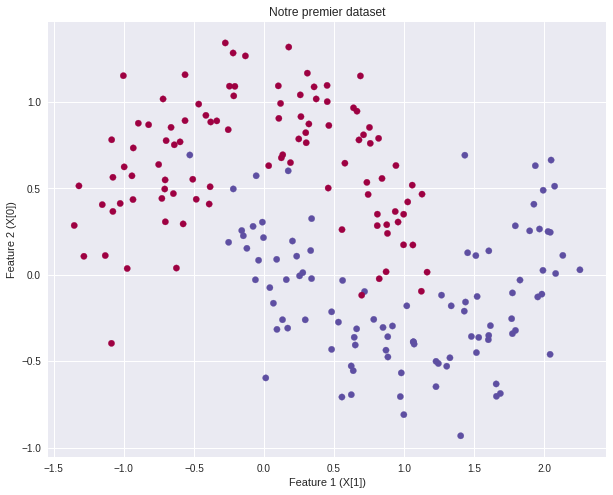

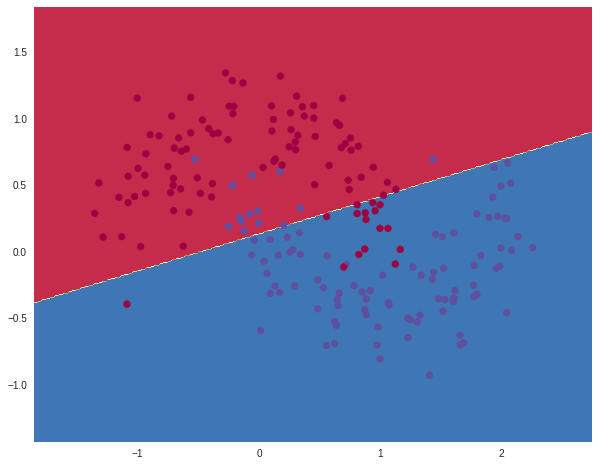

In [0]:
X, y = create_an_illustationnal_dataset()
plot_the_dataset(X, y)


separate_linearly(X,y)


### Construction

Construisons maintenant un réseau de neurones à **3 couches** avec **une couche d’entrée, une couche cachée et une couche de sortie**. 
* Le nombre de noeuds dans la couche en entrée est déterminé par la dimensionnalité de nos données (le nombre d'axes), 2. 
* De même, le nombre de noeuds dans la couche en sortie est déterminé par le nombre de classes que nous avons, également 2. (Comme nous n'avons que 2 classes, pourrait s’en sortir avec un seul noeud de sortie prédisant 0 ou 1, mais avoir 2 facilite l’extension ultérieure du réseau à plus de classes). 

Les entrées sur le réseau seront les coordonnées x et y et ses sorties seront deux probabilités, une pour la classe 0 (Rouge) et une pour la classe 1 (Bleue). Cela ressemble à quelque chose comme ça:

![NN](https://github.com/dennybritz/nn-from-scratch/raw/0b52553c84c8bd5fed4f0c890c98af802e9705e9/nn-3-layer-network.png)

Nous pouvons choisir la dimensionnalité (le nombre de nœuds) de la couche cachée. Plus nous mettons de nœuds dans la couche cachée, plus nous pourrons adapter des fonctions complexes. Mais une dimensionnalité supérieure a un coût. Premièrement, davantage de calculs sont nécessaires pour établir des prévisions et connaître les paramètres du réseau. Un plus grand nombre de paramètres signifie également que nous sommes plus enclins à **overfitter** nos données.

**Comment choisir la taille de la couche cachée?** 
Bien qu'il existe des directives générales et des recommandations, cela dépend toujours de votre problème et constitue davantage un art qu'une science. Nous allons jouer avec le nombre de nœuds dans la couche cachée plus tard et voir comment cela affecte notre sortie.

**Fonctions d'activations**

La fonction d'activation transforme les entrées de la couche en ses sorties. Une fonction d'activation non linéaire est ce qui nous permet d'ajuster des hypothèses non linéaires. 

![Texte alternatif…](https://jiayiwangjw.github.io/img/dp/ReLU.png)


**Fonction d'activation de la couche de sortie**

Parce que nous voulons que notre réseau produise des probabilités, la fonction d'activation de la couche de sortie sera la **softmax**, qui est simplement un moyen de convertir les scores bruts en probabilités.

![Texte alternatif…](https://i.ytimg.com/vi/lvNdl7yg4Pg/maxresdefault.jpg)


### Comment notre réseau fait des prédictions : FORWARD PROPAGATION


AJOUTER IMAGE

Notre réseau établit des prédictions en utilisant la **forward propagation**, qui consiste en un ensemble de multiplications matricielles et en appliquant la ou les fonctions d'activation définies ci-dessus. Si x est l'entrée bidimensionnelle de notre réseau, nous calculons notre prédiction y^ (également bidimensionnelle) comme suit:

\begin{equation} 
z_1 = x.W_1+b_1 \\
a_1 = relu(z_1)  \\
z_2 = a_1*W_2+b2 \\
a_2 = softmax(z_2)
\end{equation}

z_i est l'entrée de la couche i et a_i est la sortie de la couche i après application de la fonction d'activation. W_1, b_1, W_2, b_2 sont des paramètres de notre réseau, que nous devons apprendre de nos données d’entraînement. Vous pouvez les considérer comme des matrices transformant des données entre des couches du réseau. En regardant les multiplications de matrice ci-dessus, nous pouvons comprendre la dimensionnalité de ces matrices. Si nous utilisons 500 noeuds pour notre couche cachée, alors W_1 \ in \ mathbb {R} ^ {2 \ times500}, b_1 \ in \ mathbb {R} ^ {500}, W_2 \ in \ mathbb {R} ^ {500 \ times2}, b_2 \ in \ mathbb {R} ^ {2}. 
Vous voyez maintenant pourquoi nous avons plus de paramètres si nous augmentons la taille de la couche cachée.



### Apprendre les paramètres

Apprendre les paramètres de notre réseau signifie **trouver des paramètres (W_1, b_1, W_2, b_2)** qui minimisent l’erreur sur nos données d’entraînement. Mais comment définit-on l'erreur? Nous appelons la fonction qui mesure notre erreur la fonction de coût. Un choix courant avec la sortie softmax est la **cross-entropy-loss** (également appelée probabilité logarithmique négative). Si nous avons N exemples de formation et classes C, la perte de notre prédiction \ hat {y} par rapport aux étiquettes vraies y est donnée par:

![Texte alternatif…](https://render.githubusercontent.com/render/math?math=%5Cbegin%7Baligned%7D%0AL%28y%2C%5Chat%7By%7D%29%20%3D%20-%20%5Cfrac%7B1%7D%7BN%7D%20%5Csum_%7Bn%20%5Cin%20N%7D%20%5Csum_%7Bi%20%5Cin%20C%7D%20y_%7Bn%2Ci%7D%20%5Clog%5Chat%7By%7D_%7Bn%2Ci%7D%0A%5Cend%7Baligned%7D&mode=display)

La formule semble compliquée, mais tout ce qu’elle fait est de résumer nos exemples d’entraînement et d’ajouter à la perte si nous avions prédit le mauvais cours. Plus les deux distributions de probabilité y (les étiquettes correctes) et \ hat {y} (nos prédictions) sont éloignées, plus notre perte sera grande. En trouvant des paramètres qui minimisent les pertes, nous maximisons la probabilité de nos données d’entraînement.

**Descente de Gradient**

![Texte alternatif…](https://developers.google.com/machine-learning/crash-course/images/convex.svg?hl=fr)


En entrée, la descente de gradient nécessite les gradients (vecteur de dérivées) de la fonction de perte par rapport à nos paramètres: 
![Texte alternatif…](https://render.githubusercontent.com/render/math?math=%5Cfrac%7B%5Cpartial%7BL%7D%7D%7B%5Cpartial%7BW_1%7D%7D&mode=inline), ![Texte alternatif…](https://render.githubusercontent.com/render/math?math=%5Cfrac%7B%5Cpartial%7BL%7D%7D%7B%5Cpartial%7Bb_1%7D%7D&mode=inline), ![Texte alternatif…](https://render.githubusercontent.com/render/math?math=%5Cfrac%7B%5Cpartial%7BL%7D%7D%7B%5Cpartial%7BW_2%7D%7D&mode=inline), ![Texte alternatif…](https://render.githubusercontent.com/render/math?math=%5Cfrac%7B%5Cpartial%7BL%7D%7D%7B%5Cpartial%7Bb_2%7D%7D&mode=inline)


Pour calculer ces gradients, nous utilisons le célèbre algorithme de **backpropagation **, qui permet de calculer efficacement les gradients à partir de la sortie. Je n’expliquerai pas en détail le fonctionnement de la rétropropagation, mais de nombreuses excellentes explications (ici ou ici) circulent sur le Web.

En appliquant la formule de rétropropagation, nous trouvons ce qui suit (faites-moi confiance):

\begin{equation} 
delta_3 = \hat{y} - y \\
d_2 = delta_3*W_2* drelu(z_1)  \\
\frac{\partial L}{\partial W_2}\ = transpose(a_1)*delta_3 \\
\frac{\partial L}{\partial b_2}\ = delta_3 \\
\frac{\partial L}{\partial W_1}\ = transpose(x)*delta_2 \\
\frac{\partial L}{\partial b_1}\ = =delta_2
\end{equation}



## Implémentation d'un Réseau de Neurone Profond en Python

In [0]:
num_examples = len(X) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality

# Gradient descent parameters (I handpicked these)
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

![Texte alternatif…](https://d17h27t6h515a5.cloudfront.net/topher/2016/December/5840d0aa_gradient-descent-convergence/gradient-descent-convergence.gif)
Ideal
![Texte alternatif…](https://d17h27t6h515a5.cloudfront.net/topher/2016/December/5840d077_gradient-descent-divergence/gradient-descent-divergence.gif)
Trop élevé

### Fonctions d'activation

![Texte alternatif…](https://ml4a.github.io/images/figures/relu.png)

In [0]:
def relu(x):
    return x * (x > 0)

def drelu(x):
    return 1. * (x > 0)

 ### Fonction d'activation de la dernière couche d'une problème de classification : SOFTMAX

![Texte alternatif…](https://jamesmccaffrey.files.wordpress.com/2016/03/softmaxequation.jpg?w=640)

In [0]:
def softmax(x):
    return np.exp(x)/np.sum(np.exp(x), axis=1, keepdims=True)

### Initialization with random weights

In [0]:
def initialize_params(nn_hdim):
    model = {}
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))
    model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    return model

### Forward Propagation (a.k.a Prediction)

\begin{equation} 
z_1 = x.W_1+b_1 \\
a_1 = relu(z_1)  \\
z_2 = a_1*W_2+b2 \\
a_2 = softmax(z_2)
\end{equation}

In [0]:
def forward(model, X):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    z1 = X.dot(W1) + b1
    a1 = relu(z1)
    z2 = a1.dot(W2) + b2
    y_hat = softmax(z2)
    return y_hat, z1, a1, z2

In [0]:
def predict(model, x):
    # Forward propagation
    y_hat, _, _, _ = forward(model, x)
    return np.argmax(y_hat, axis=1)

### Backward Propagation (calcul du gradient de l'erreur)

\begin{equation} 
delta_3 = \hat{y} - y \\
d_2 = delta_3*W_2* drelu(z_1)  \\
\frac{\partial L}{\partial W_2}\ = transpose(a_1)*delta_3 \\
\frac{\partial L}{\partial b_2}\ = delta_3 \\
\frac{\partial L}{\partial W_1}\ = transpose(x)*delta_2 \\
\frac{\partial L}{\partial b_1}\ = =delta_2
\end{equation}

In [0]:
def backward (delta3, a1, W2, z1):
    grads = {}
    delta3[range(num_examples), y] -= 1 ## Calculates the difference between actual output and predicted output
    dW2 = (a1.T).dot(delta3)
    db2 = np.sum(delta3, axis=0, keepdims=True)
    delta2 = delta3.dot(W2.T)*drelu(z1)
    dW1 = np.dot(X.T, delta2)
    db1 = np.sum(delta2, axis=0)
    grads = { 'dW1': dW1, 'db1': db1, 'dW2': dW2, 'db2': db2}

    return grads

In [0]:
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    probs, _, _, _ = forward(model,X)
    # Calculating the loss
    correct_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(correct_logprobs)
    # Add regulatization term to loss (optional)
    #data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

### L'apprentissage des paramètres (a.k.a Training)

In [0]:
def update_model(model, grads):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    dW1, db1, dW2, db2 = grads['dW1'], grads['db1'], grads['dW2'], grads['db2']
    
    # Add regularization terms (b1 and b2 don't have regularization terms)
    #dW2 += reg_lambda * W2
    #dW1 += reg_lambda * W1

    # Gradient descent parameter update
    W1 += -epsilon * dW1
    b1 += -epsilon * db1
    W2 += -epsilon * dW2
    b2 += -epsilon * db2
    model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    return model

In [0]:
def train(nn_hdim, num_passes=20000, print_loss=False):
 
    # This is what we return at the end
    model = initialize_params(nn_hdim)
    # Gradient descent. For each batch...
    for i in range(0, num_passes):
        grads = {}
        W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
        # Forward propagation
        prediction, z1, a1, z2 = forward(model, X)
        # Backpropagation
        grads = backward(prediction, a1, W2, z1)
        # Assign new parameters to the model
        model = update_model(model, grads)

        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 1000 == 0:
            print ("Loss after iteration %i: %f" %(i, calculate_loss(model)))
    return model


### Lancement du Training

Loss after iteration 0: 0.560274
Loss after iteration 1000: 0.072179
Loss after iteration 2000: 0.071301
Loss after iteration 3000: 0.071159
Loss after iteration 4000: 0.071190
Loss after iteration 5000: 0.071136
Loss after iteration 6000: 0.071276
Loss after iteration 7000: 0.071090
Loss after iteration 8000: 0.071265
Loss after iteration 9000: 0.071084
Loss after iteration 10000: 0.071090
Loss after iteration 11000: 0.071087
Loss after iteration 12000: 0.071086
Loss after iteration 13000: 0.071069
Loss after iteration 14000: 0.071114
Loss after iteration 15000: 0.071074
Loss after iteration 16000: 0.071113
Loss after iteration 17000: 0.071071
Loss after iteration 18000: 0.071090
Loss after iteration 19000: 0.071219
{'W1': array([[ 2.8598692 , -3.28237701,  6.86683287],
       [ 3.0710577 , -0.10992254,  0.82698442]]), 'b1': array([[-0.89501778,  0.62810072, -7.6351492 ]]), 'W2': array([[ 2.96560932, -2.90320601],
       [ 2.20360075, -2.17958578],
       [-4.94949364,  5.07436703]]),

Text(0.5,1,'Decision Boundary for hidden layer size 3')

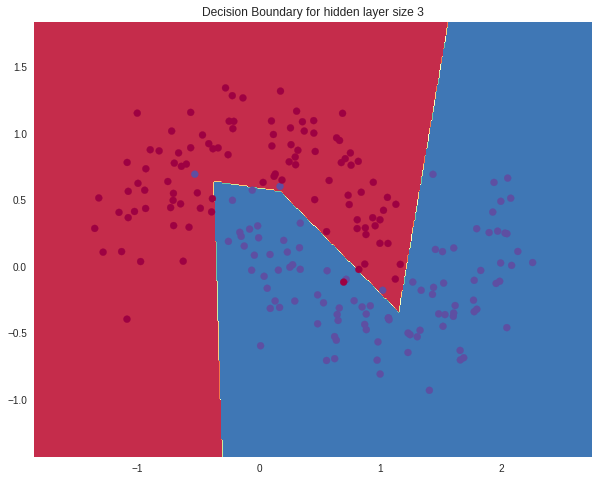

In [0]:
# Build a model with a 3-dimensional hidden layer
model = train(3, print_loss=True)
print(model)
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")

### Incidence du nombre de neurones dans la couches cachée sur la frontière de décision

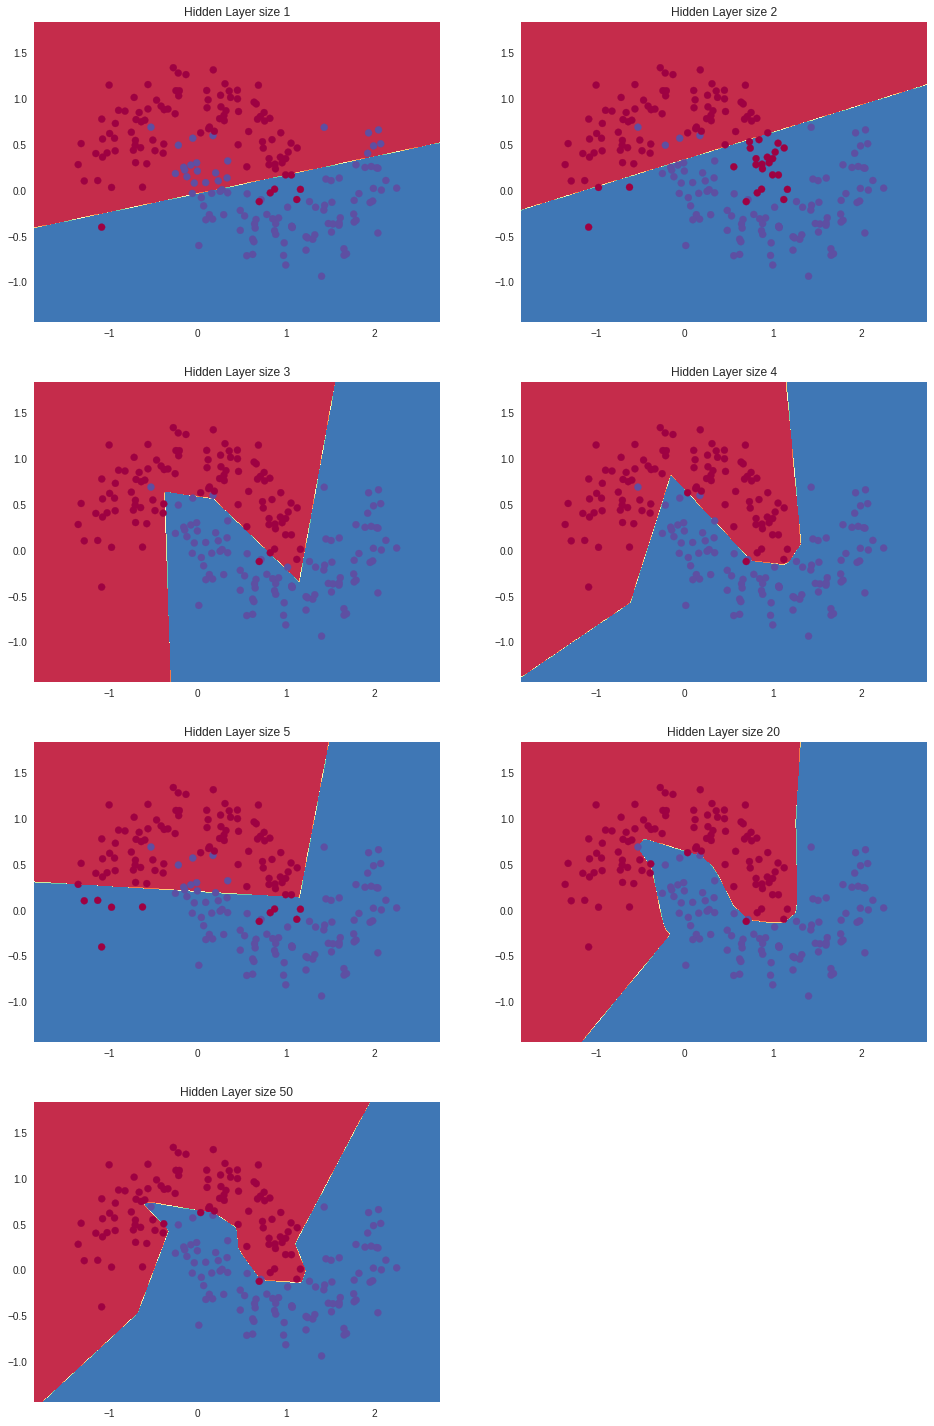

In [0]:
plt.figure(figsize=(16, 32))
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer size %d' % nn_hdim)
    model = train(nn_hdim)
    plot_decision_boundary(lambda x: predict(model, x))
plt.show()

**Exercices**
Voici certaines choses que vous pouvez essayer de mieux connaître le code:

* Au lieu de la **batch gradient descent** utilisez **minibatch gradient descent** (plus d'infos) pour former le réseau. La descente de gradient par minibatch donne généralement de meilleurs résultats dans la pratique.
* Nous avons utilisé un taux d’apprentissage fixe $ \ epsilon $ pour la descente de gradient. Mettre en place un calendrier de recuit pour le taux d'apprentissage de la descente de gradient (plus d'infos).
* Nous avons utilisé une fonction d'activation $ \ tanh $ pour notre couche cachée. Expérimentez avec d'autres fonctions d'activation (certaines sont mentionnées ci-dessus). Notez que changer la fonction d'activation signifie aussi changer le dérivé de la rétropropagation.
* Étendre le réseau de deux à trois classes. Vous devrez générer un jeu de données approprié pour cela.
* Étendez le réseau à quatre couches. Expérimentez avec la taille de la couche. L'ajout d'une autre couche masquée signifie que vous devrez ajuster à la fois la propagation directe et le code de rétro-propagation.

# Application sur MNIST

## Exploration des données

Le but ici est de savoir quel est la forme des données en mémoire. Comment a t on choisi de représenter informatiquement ces images.

### L'étape inévitable. Regarder la dimension et le type des données.

A fin de garder cette partie petite, on va intégrer les explications directement dans le code.

In [0]:
X, y = get_mnist_data()
flat_x = X.reshape(-1)
print('Dataset téléchargé: exemples X, labels y.')
print('\nJettons un oeil à la dimension des data.')
print('> X.shape = ', X.shape)
print('> y.shape = ', y.shape)
print(f'On dirait qu\'il y a {y.shape[0]} exemples.')
print("\nEssayons d'accéder à un de ces exemples.")
print("> X[0].shape = ", X[0].shape)
print("\nOk on dirait que chaque exemple est composé de 784 nombres.")
print("Logique étant donné que MNIST est composé d'images qui font 28x28.\n")
print('Maintenant regardons les nombres de plus près:')
print(f"> X[0][0] = {X[0][0]}\n> type(X[0]X[0])={type(X[0][0])}")
print(f"> X[0][784] = {X[0][-1]}\n> type(X[0]X[0])={type(X[0][0])}")
print("\nOk donc pour X on a des int.")
print("\nRegardons la plage de valeur que peuvent prendre ces int.")
print(f"Nombre de pixels dans notre dataset: len(X.reshape(-1))= {len(flat_x)}")
print("> max(X.reshape(-1)) = ", max(flat_x))
print("> min(X.reshape(-1)) = ", min(flat_x))
print("\nDonc des int compris entre 0 et 255.")
print("Ca a du sens pour des images en noir & blanc.")

Dataset téléchargé: exemples X, labels y.

Jettons un oeil à la dimension des data.
> X.shape =  (70000, 784)
> y.shape =  (70000,)
On dirait qu'il y a 70000 exemples.

Essayons d'accéder à un de ces exemples.
> X[0].shape =  (784,)

Ok on dirait que chaque exemple est composé de 784 nombres.
Logique étant donné que MNIST est composé d'images qui font 28x28.

Maintenant regardons les nombres de plus près:
> X[0][0] = 0.0
> type(X[0]X[0])=<class 'numpy.float64'>
> X[0][784] = 0.0
> type(X[0]X[0])=<class 'numpy.float64'>

Ok donc pour X on a des int.

Regardons la plage de valeur que peuvent prendre ces int.
Nombre de pixels dans notre dataset: len(X.reshape(-1))= 54880000
> max(X.reshape(-1)) =  255.0
> min(X.reshape(-1)) =  0.0

Donc des int compris entre 0 et 255.
Ca a du sens pour des images en noir & blanc.


In [0]:
print(f"\nMaintenant regardons les labels y, y.shape = {y.shape}.")
print(f"> y[0] = {y[0]} \n> type(y[0])={type(y[0])}")
print(f"> y[-1] = {y[-1]} \n> type(y[-1])={type(y[-1])}")
print(f"> y = {y}")
print("\nOn voit que le type de chaque label est une chaîne de caractères.")
print("Et il semblerait que les labels n'ait pas été trié.")
print("\nCheckons la plage de valeur:")
print(f"min(y) = {np.min(y)}")
print(f"max(y) = {np.max(y)}")
print("\nOk il semble qu'il y ai 10 classes, indexée de 0 à 9.")
print("\nJettons un oeil à la disitribution des classes.")

for i in range(10):
  print(f"Class {i} : {(1 * (y == str(i))).sum()}")

print("\nLes classes du dataset semble équilibrées.")


Maintenant regardons les labels y, y.shape = (70000,).
> y[0] = 5 
> type(y[0])=<class 'str'>
> y[-1] = 6 
> type(y[-1])=<class 'str'>
> y = ['5' '0' '4' ... '4' '5' '6']

On voit que le type de chaque label est une chaîne de caractères.
Et il semblerait que les labels n'ait pas été trié.

Checkons la plage de valeur:
min(y) = 0
max(y) = 9

Ok il semble qu'il y ai 10 classes, indexée de 0 à 9.

Jettons un oeil à la disitribution des classes.
Class 0 : 6903
Class 1 : 7877
Class 2 : 6990
Class 3 : 7141
Class 4 : 6824
Class 5 : 6313
Class 6 : 6876
Class 7 : 7293
Class 8 : 6825
Class 9 : 6958

Les classes du dataset semble équilibrées.



Maintenant essayons de jeter un oeil à ces images.

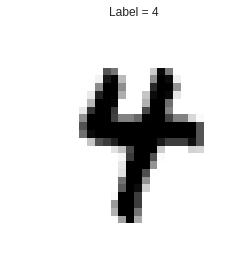

In [0]:
quantite_de_nombre_a_afficher = 1

random_indices = np.random.randint(low=0, high=60000, 
                                   size= quantite_de_nombre_a_afficher)

for i in random_indices:
  plot_x_image(X[i], y[i])

### Récapitulons:

1.   On a 70000 exemples.
2.   Les images ont été applaties et font 784 pixels de long.
3.   Les pixels sont représentés avec des entiers de 8 bits.
4.   La valeur des pixels est comprise entre 0 et 255
5.   Les labels sont représentées avec chaines de caractères.
6.   Les classes sont équilibrées, environ 7000 de chaque.
7.   Les X représente des images de nombre écrits à la main, comme prévu.

## Préprocessing

On veut brancher nos exemples à notre réseau de neurones qui est plutot rigide quant au format de donner qu'il accepte. Par exemple, il n'accepte pas les chaînes de caractère.



*   **Normalization **: On réduit la plage de valeur de nos entrées. Ce qui est important est leur relation entre elles, pas leur valeur absolu.
*   **One Hot Encoding**: Pour ne pas exprimer implicetement une hiérarchie entre nos labels.
*   **Split Train Test** : Afin de vérifier la qualité de l'apprentissage de notre réseau sur des données inédites, on réserve de côté une partie des données qu'on excluera de l'entraînement.



## Let's do this, preprocessing.

In [2]:
X, y = get_mnist_data()

print("\n\nNormalizing pixel value by 255.")
# TODO NORMALIZE
X = X / 255.
print(f"Now pixel value is between {min(X[0])} and {max(X[0])}")
  
# one-hot encode labels
# TODO: Ecrire les nombre de classes, et le nombre d'exemples
digits = 10
examples = y.shape[0]


print("\nOne hot encoding of the labels.\nConversion from string to int32.")
# TODO appeller la fonction ONE HOT ENCODING
Y_new =  one_hot_encoding(y, examples, digits)

# split, reshape
n_train = 60000
## TODO split les données grace au slicing.
n_test = X.shape[0] - n_train
X_train, X_test = X[:n_train].T, X[n_train:].T
y_train, y_test = Y_new[:,:n_train], Y_new[:,n_train:]



print("Verifying sets balance.\n")
print("          TRAIN  TEST")
print("-"*22)
test_distro = y_test.sum(axis=1).astype(int)
train_distro = y_train.sum(axis=1).astype(int)
print(f"TOTAL:    {n_train}  {n_test}")
for i in range(digits):
  print(f"Class {i} :",
        train_distro[i]," ",
        test_distro[i]        
)


print("\n\nDatasets shape after preprocessing.")
print(f"X_train.shape = {X_train.shape}")
print(f"y_train.shape = {y_train.shape}")
print(f"\nX_test.shape  = {X_test.shape}")
print(f"y_test.shape  = {y_test.shape}")




Normalizing pixel value by 255.
Now pixel value is between 0.0 and 1.0

One hot encoding of the labels.
Conversion from string to int32.
Verifying sets balance.

          TRAIN  TEST
----------------------
TOTAL:    60000  10000
Class 0 : 5923   980
Class 1 : 6742   1135
Class 2 : 5958   1032
Class 3 : 6131   1010
Class 4 : 5842   982
Class 5 : 5421   892
Class 6 : 5918   958
Class 7 : 6265   1028
Class 8 : 5851   974
Class 9 : 5949   1009


Datasets shape after preprocessing.
X_train.shape = (784, 60000)
y_train.shape = (10, 60000)

X_test.shape  = (784, 10000)
y_test.shape  = (10, 10000)


## Let's do this, l'initialisation des poids

![Texte alternatif…](https://image.slidesharecdn.com/deeplearning8-180128132050/95/deep-learning-book-8487-8-638.jpg?cb=1517145740)



In [0]:
np.random.seed(12)

def parameters_initialization(hidden_layers, n_x=784, n_classes=10):
  """ Initialize the network's parameters.
  Arguments:
  ----------
      hidden_layers: list of each hidden layer's number of unit. (i.e. [64, 64])
                n_x: size of the input x, default is 784 for MNIST
          n_classes: size of the output y_hat, default is 10 for MNIST
  """
  params = {}
  layers_size = [n_x, n_classes]
  layers_size[1:1] = hidden_layers
  params['n_layers'] = len(layers_size) - 1 # minus 1 coz input layer
  
  print(f'Creating a {params["n_layers"]}-layers DNN.')
  print(f'With the following architecture: {layers_size}')
  
  for j in range(params['n_layers']):
    i = j + 1 # By convention, layers are indexed starting from 1
    
    n_in  = layers_size[i - 1]
    n_out = layers_size[i]
    
    # C'est ICI que ça se passe.
    # TODO : replace n_in/n_out by ____ and let them fill the blank.
    params[f"W{i}"] = np.random.randn(n_out, n_in) * np.sqrt(12. / (n_out + n_in))
    params[f"b{i}"] = np.zeros((n_out, 1))
  
  return params


## Let's do this, Feed Forward

In [0]:
is_this_last_layer?

In [0]:
is_this_first_layer?

In [0]:
def relu(z):
    return z * (z >= 0)

def softmax(z):
    return np.exp(z) / np.sum(np.exp(z), axis=0)
  
def feed_forward(X, params):
    """
    """
    cache = {}
    for j in range(params['n_layers']):
      i = j + 1 # By convention, layers are indexed starting from 1
      
      # If this is the first layer we use the inputs instead of the activations 
      # from the previous layer.
      prev_acti = X if is_this_first_layer(cache) else cache[f"A{i - 1}"]
      # Activation is ReLU for all layers, except the last one for which it's
      # a softmax.
      acti_func = softmax if i == params['n_layers'] else relu
      
      # Compute préactivations Z for this layer from the parameters and the 
      # outputs of the previous layer.
      cache[f"Z{i}"] = np.dot(params[f"W{i}"], prev_acti) + params[f"b{i}"]
      # Compute Activations applying the activation function on 
      # the preactivations 
      cache[f"A{i}"] = acti_func(cache[f"Z{i}"])
    
    return cache


### Let's do this, Backpropagation

![backprop](https://cdn-images-1.medium.com/max/1600/1*6q2Rgd8W9DoCN9Wfwc_9gw.png)

![Texte alternatif…](https://i.stack.imgur.com/e2c4b.png)

In [0]:
def d_relu(z):
    return 1. * (z >= 0)

  
def back_propagate(X, y, params, cache, this_batch_size):
  
    norm_factor = 1 / this_batch_size
    grads = {}
    cache["A0"] = X

    
    for j in reversed(range(params['n_layers'])):
      i = j + 1 # By convention, layers are indexed starting from 1

      if not grads:
        dZ = cache[f"A{i}"] - y
      else:
        dA = np.dot(params[f"W{i + 1}"].T, dZ)
        dZ = dA * d_relu(cache[f'Z{i}'])
      

      grads[f"dW{i}"] = norm_factor * np.dot(dZ, cache[f"A{i - 1}"].T)
      grads[f"db{i}"] = norm_factor * np.sum(dZ, axis=1, keepdims=True)

    return grads

## Petite vérif' pour la route avant de continuer.

In [8]:
params = parameters_initialization([16, 16])

print("Quick sanity check for dimensions.")
cache = feed_forward(X_train, params)
for key, value in cache.items():
  print(key, value.shape)

last = params['n_layers']
print("\nSumming over output, must be equal to  60000:",cache[f'A{last}'].sum())

print("Quick sanity check, must be around .1 (random luck)")
evaluate_network(X_test, y_test, params)
grads = back_propagate(X_train, y_train, params, cache, X_train.shape[1])

print("Quick check of dimensions.")
for key, value in grads.items():
  print(key, value.shape)

Creating a 3-layers DNN.
With the following architecture: [784, 16, 16, 10]
Quick sanity check for dimensions.
Z1 (16, 60000)
A1 (16, 60000)
Z2 (16, 60000)
A2 (16, 60000)
Z3 (10, 60000)
A3 (10, 60000)

Summing over output, must be equal to  60000: 60000.00000000003
Quick sanity check, must be around .1 (random luck)
              precision    recall  f1-score   support

           0       0.00      0.05      0.00        20
           1       0.00      0.00      0.00        62
           2       0.20      0.10      0.14      2034
           3       0.49      0.11      0.18      4359
           4       0.07      0.08      0.07       971
           5       0.01      0.27      0.01        22
           6       0.04      0.08      0.05       433
           7       0.03      0.35      0.05        86
           8       0.00      1.00      0.00         1
           9       0.18      0.09      0.12      2012

   micro avg       0.10      0.10      0.10     10000
   macro avg       0.10      0.2

## Training Loop

In [0]:
def update_params(params, grads, learning_rate):
    """ Ici que se fait gradient descent, 
    Retourne params, les paramètres mis à jour.
    """
    for each in params.keys():
        if each == "n_layers": continue
        params[each] = params[each] - learning_rate * grads[f"d{each}"]
    return params

In [0]:
def predict(X, params):
  """ Cette fonction permet d'utiliser les paramètres du réseaux pour faire une 
  prédiction sur X.
  Retourne une liste de predictions. 
  """
  last_layer_index = params["n_layers"]
  cache = feed_forward(X, params)
  predictions = np.argmax(cache[f"A{last_layer_index}"], axis=0)
  return predictions


In [0]:
def compute_loss(y, y_hat):
    """ Il s'agit de la catégoricale cross entropy.
    Retourne la Loss L
    """
    L_sum = np.sum(np.multiply(y, np.log(y_hat)))
    m = y.shape[1]
    L = -(1./m) * L_sum
    return L

### Fonctions utiles

In [0]:
shuffling_data?

In [0]:
get_mini_batch_indices?

In [0]:
get_minibatch?

In [0]:
report_training_improvement?

In [0]:
evaluate_network?

### Let's do this, Training Loop

In [0]:
def train_neural_net(X, y, params, X_eval=None, y_eval=None, learning_rate=1,
                     batch_size=None, n_epoch=100):
  
    # If batch size is unspecified, perform Batch Gradient Descent instead of
    # Minibatch Gradient Descent
    if batch_size is None: batch_size = X.shape[1]
      
    # Computing the number of minibatch. Will be the total of full minibatches
    # plus one (or possibly zero) incomplete minibatch. 
    # i.e: Train set size = 3, batch_size = 2
    # then, number of minibatch =2 (one minibatch of size 2 , and one of size 1)
    n_batch = int(np.ceil(X.shape[1] / batch_size))

    
    # TODO: Use X, the batchsize, and the number of batches to compute the 
    # minibatch indices.
    minibatch_indices = list(get_mini_batch_indices(X, batch_size, n_batch)) 
    
    # Let's the training begin. It will run for n_epoch.
    for epoch in range(n_epoch):

        # TODO:Shuffle the data to keep the network from learning data in the 
        # same order.
        X, y = shuffling_data(X, y)

        # Now we will perform weight update on each minibatch.
        for mb_indices in minibatch_indices:
          
            # TODO:Use the mini batch indices to get the minibatch for this 
            # iteration.
            X_mini, y_mini, this_batch_size = get_minibatch(X, y, mb_indices)

           
            # TODO:Use the minibatch to perform a prediction with respect to the 
            # current parameters.
            cache = feed_forward(X_mini, params)
            
            # Backprogate the error in the mini_batch.
            grads = back_propagate(X_mini, y_mini,
                                   params, cache,
                                   this_batch_size)
 
            # TODO:With the gradient of the cost function, update the parameters
            # with respect to the specified learning rate.
            params = update_params(params, grads, learning_rate)

            
        # At the end of every epoch, report the training improvement.
        report_training_improvement(X, y, X_eval, y_eval, params, epoch)
        
    print("Done.")
    return params



In [15]:
# initialization
np.random.seed(12)
hidden_layers = [32, 16]
params = parameters_initialization(hidden_layers)
batch_size = 128

trained_params = train_neural_net(X_train, y_train, params,
                                 X_eval=X_test, y_eval=y_test,
                                 batch_size=batch_size, 
                                 n_epoch=5, learning_rate=.1)

Creating a 3-layers DNN.
With the following architecture: [784, 32, 16, 10]
Epoch 1: training cost = 0.28688234625672576, test cost = 0.27633170863739304
Epoch 2: training cost = 0.23288200222322256, test cost = 0.23901168441107293
Epoch 3: training cost = 0.19743512977498393, test cost = 0.21303204915469456
Epoch 4: training cost = 0.16716777121982307, test cost = 0.18713357023281849
Epoch 5: training cost = 0.1490411694258048, test cost = 0.17040849091206065
Done.


In [16]:
evaluate_network(X_test, y_test, trained_params)

              precision    recall  f1-score   support

           0       0.99      0.94      0.97      1024
           1       0.98      0.98      0.98      1132
           2       0.94      0.96      0.95      1008
           3       0.92      0.95      0.94       984
           4       0.97      0.94      0.95      1011
           5       0.93      0.93      0.93       889
           6       0.95      0.97      0.96       943
           7       0.96      0.94      0.95      1052
           8       0.94      0.93      0.93       982
           9       0.93      0.96      0.94       975

   micro avg       0.95      0.95      0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

